In [1]:
import numpy as np

In [3]:
#1
f=lambda x: x*np.log(x)
a=0.01;b=1
h=b-a
r11=h/2*(f(a)+f(b))
r21=r11/2+h/2*f(a+h/2)
r31=r21/2+h/4*(f(a+h/4)+f(a+h*(3/4)))
r41=r31/2+h/8*(f(a+h/8)+f(a+h*(3/8))+f(a+h*(5/8))+f(a+h*(7/8)))
r22=(4*r21-r11)/(4-1)
r32=(4*r31-r21)/(4-1)
r42=(4*r41-r31)/(4-1)
r33=(4**2*r32-r22)/(4**2-1)
r43=(4**2*r42-r32)/(4**2-1)
r44=(4**3*r43-r33)/(4**3-1)
r44

-0.24933333939830568

In [4]:
from scipy.integrate import quad
quad(f,0.01,1)

(-0.24974474149069875, 8.684431416882077e-11)

In [5]:
#quad결과와 비교한 결과 1e-3부터 차이가 나기 시작한다

In [ ]:
#2

In [33]:
import math

def gaussNodes(m,tol=10e-9):

    def legendre(t,m):
        p0 = 1.0; p1 = t
        for k in range(1,m):
            p = ((2.0*k + 1.0)*t*p1 - k*p0)/(1.0 + k )
            p0 = p1; p1 = p
        dp = m*(p0 - t*p1)/(1.0 - t**2)
        return p,dp
    A = np.zeros(m)
    x = np.zeros(m)
    nRoots = int((m + 1)/2) # Number of non-neg. roots
    for i in range(nRoots):
        t = math.cos(math.pi*(i + 0.75)/(m + 0.5))# Approx. root
        for j in range(30):
            p,dp = legendre(t,m) # Newton-Raphson
            dt = -p/dp; t = t + dt # method
            if abs(dt) < tol:
                x[i] = t; x[m-i-1] = -t
                A[i] = 2.0/(1.0 - t**2)/(dp**2) # Eq.(6.25)
                A[m-i-1] = A[i]
                break
    return x,A

def gaussQuad(f,a,b,m,k,sigma):
    c1 = (b + a)/2.0
    c2 = (b - a)/2.0
    x,A = gaussNodes(m)
    sum = 0.0
    for i in range(len(x)):
        sum = sum + A[i]*f(c1 + c2*x[i],k,sigma)
    return c2*sum


In [34]:
def f(x,sigma):
  # sigma=0.5
  return np.exp(-(x/sigma)**2)/np.sqrt(sigma)

def F(x,k,sigma):

  return f(x,sigma)*np.exp(k*x*1j)/np.sqrt(2*np.pi)

In [38]:
k_list=np.arange(-5,5.2,0.2)
F_k1=np.zeros(len(k_list))
F_k2=np.zeros(len(k_list))
for i,k in enumerate(k_list):
  F_k1[i]=gaussQuad(F,-1,1,5,k,0.5)
  F_k2[i]=gaussQuad(F,-1,1,5,k,1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


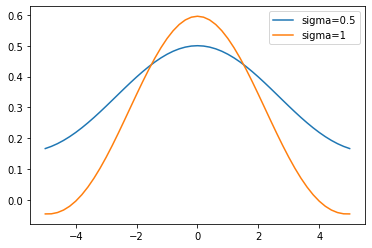

In [41]:
import matplotlib.pyplot as plt
plt.plot(k_list,F_k1,label='sigma=0.5')
plt.plot(k_list,F_k2,label='sigma=1')
plt.legend()

In [6]:
#3
x=np.array([1,1.15,1.3,1.45,1.6])
y=np.array([30,38.55,46.20,52.95,58.8])
h=x[1]-x[0]
simshon=(y[0]+4*y[1]+2*y[2]+4*y[3]+y[4])*(h/3)
simshon

27.359999999999985